<a href="https://colab.research.google.com/github/Ikhwan22/tugasBisnisCerdas3/blob/main/pertemuan3DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Melakukan Import Package
1. pandas untuk data analisis
2. numpy untuk numerical computing
3. scikit-learn / sklearn untuk machine learning
4. googl.colab untuk upload file dari local



In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn import metrics
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import cv2

from google.colab import files
import io

# Melakukan Upload File Iris Dataset
*   Terdapat beberapa cara dalam membaca file di google colab
*   Cara yang digunakan adalah membaca file melalui penyimpanan local



In [2]:
uploaded = files.upload()

Saving iris.data to iris.data


# Membaca File Iris Dataset dengan Pandas Dataframe
* File yang dibaca, akan diubah menjadi dataframe oleh pandas
* Dataframe merupakan struktur data 2 dimensi yang terdiri dari row dan column yang dapat dimodifikasi
* Inisialisasi nama adalah "iris"



In [3]:
iris = pd.read_csv(io.BytesIO(uploaded["iris.data"]))

# Mengubah Nama Kolom / Nama Fitur
* 5 fitur/kolom yang diberikan berisi: 
  ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class']
* 5 fitur/kolom diberi nama = "FEATURE_NAMES"
* Melakukan perubahan nama kolom pada dataset dengan perintah '.set_axis()'
* Inisialisasi nama adalah "X"

In [4]:
FEATURE_NAMES = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class']

iris = iris.set_axis(FEATURE_NAMES, axis=1)
X = iris

# Menampilkan Data dalam Dataframe
* Data yang ditampilkan merupakan 5 teratas dan 5 terbawah
* Menampilkan isi dari 5 fitur yang telah dinamai sebelumnya
* Pada pemberian nama kolom yang dilakukan sebelumnya, pemberian nama dilakukan pada kolom pertama, maka baris pertama dihapus (membuat data yang ditampilkan menjadi 149 bukan 150)

In [5]:
X[:150]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


# Kategori Klasifikasi 
1. Kategori Klasifikasi didasarkan pada spesies
2. Nama spesies diubah menjadi angka
> * Iris-setosa	= 0
> * Iris-versicolor	= 1
> * Iris-virginica	= 2
3. Menggunakan 'np.select()' untuk mengubah isi kategori kelas



In [6]:
conditions = [
              iris['Class'].eq('Iris-setosa'),
              iris['Class'].eq('Iris-versicolor'),
              iris['Class'].eq('Iris-virginica')
              ]
choices = [0, 1, 2]
iris['Class'] = np.select(conditions, choices)

# Menampilkan Isi Kategori Klasifikasi
* Memastikan data pada kolom 'Class' berupa angka/integer
* Baris data output di ubah menjadi array
* Inisialisasi nama variabel = 'y'

In [7]:
iris['Class'] = iris['Class'].astype('int')
y = np.asarray(iris['Class'])

# Menampilkan Array Fitur Tipe/Class Spesies
* Parameter data yang ditampilkan 150
* Pada pemberian nama kolom yang dilakukan sebelumnya, pemberian nama dilakukan pada kolom pertama, maka baris pertama dihapus (membuat data yang ditampilkan menjadi 149 bukan 150)

In [8]:
y[:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Membentuk Bagian Training dan Testing Model
1. Pembuatan model klasifikasi, diperlukan pembagian data untuk proses training dan proses testing
2. Proses training merupakan proses untuk membentuk model dengan menggunakan data training
3. Proses testing merupakan proses untuk mengetes bagaimana performa dari model tersebut ketika diberikan data yang sebelumnya tidak pernah dilihat pada proses traning
4. 'X_train' dan 'y_train' akan digunakan sebagai proses training
5. 'X_test' digunakan sebagai data testing untuk prediksi
6. Hasil prediksi akan dibandingan dengan 'y_test'
7. Pembagian data:
> * Data testing yang digunakan sebesar 35% / 0.35 
> * Model train set = 96 dari 149 data
> * Model test set = 53 dari 149 data
> * Nilai random state/bilangan acak yang diberikan = 96218061 (sesuai dengan nim mahasiswa H96218061)



In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.35, random_state=96218061)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (96, 5) (96,)
Test set: (53, 5) (53,)


# Model Entropy
* Membuat Decision Tree Clasification dengan kriteria 'entropy' dan panjang kedalaman adalah 6 tingkat
* Inisialisasi nama = 'model_entropy'
* Melakukan training model dengan 'X_train' dan 'y_train'

In [10]:
model_entropy = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
model_entropy.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Export Decision Tree Dalam DOT Format (Entropy)
* Menggunakan 'export_graphviz' pada sklrean.tree
* Model yang digunakan = 'model_entropy'
* Output berupa 'tree.dot' (object)
* Fitur yang digunakan berasal dari 'FEATURE_NAMES'



In [11]:
export_graphviz(model_entropy, 'tree.dot', feature_names = FEATURE_NAMES)

# Representasi Decision Tree (Entropy)
* Menghasilkan representasi GraphViz dari Decision Tree, yang ditulis dalam out_file
* Setelah diekspor, rendering grafis dapat diubah dalam format png
* Output file bernama 'tree_entropy.png'

In [12]:
!dot -Tpng tree.dot -o tree_entropy.png

# Menampilkan Decision Tree (Entropy)
* Menggunakan 'cv2.imread()' pada matplotlib.pyplot (plt) untuk membaca gambar
* Inisialisasi nama 'img_entropy'
* Ukuran gambar 20 x 20
* Menampilkan gambar


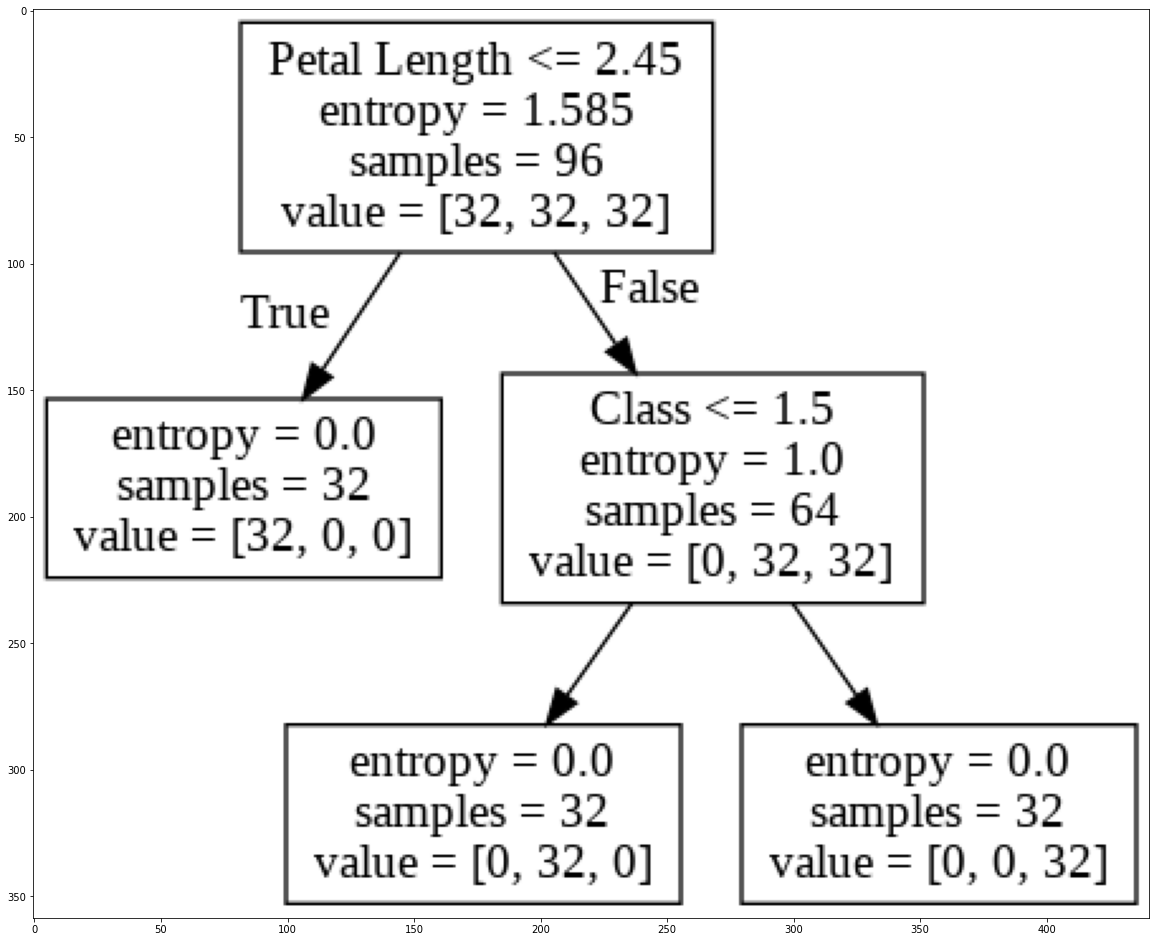

In [13]:
img_entropy = cv2.imread('tree_entropy.png')
plt.figure(figsize = (20, 20))
plt.imshow(img_entropy)

# Menentukan Prediksi Test (Entropy)
* Model yang digunakan = 'model_entropy'
* Data yang diprediksi berasal dari 'X_test'
* Inisialisasi nama = 'predicted_tree_entropy'

In [14]:
predicted_tree_entropy = model_entropy.predict(X_test)

# Melihat Nilai Akurasi (Entropy)
* Menggunakan metricss pada sklearn
* Perbandingan yang digunakan 'y_test' dan prediksi 'predicted_tree_entropy'

In [15]:
metrics.accuracy_score(y_test, predicted_tree_entropy)

1.0

# Melihat Laporan Klasifikasi (Entropy)
* Model yang digunakan = 'model_entropy'
* Terdapat 3 matriks, yaitu: precision, recall, dan f1-score.
* Semakin tinggi nilai, semakin banyak hasil klasifikasinya.
* Pembagian data testing adalah 53
> 1. Iris-setosa	(0) 	= 17
> 2. Iris-versicolor (1)	= 18
> 3. Iris-virginica 2)	= 18


In [16]:
print(classification_report(y_test, predicted_tree_entropy))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



# Model Gini
* Membuat Decision Tree Clasification dengan kriteria 'gini' dan panjang kedalaman adalah 6 tingkat
* Inisialisasi nama = 'model_gini'
* Melakukan training model dengan 'X_train' dan 'y_train'

In [17]:
model_gini = DecisionTreeClassifier(criterion="gini", max_depth = 6)
model_gini.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Export Decision Tree Dalam DOT Format (Gini)
* Menggunakan 'export_graphviz' pada sklrean.tree
* Model yang digunakan = 'model_gini'
* Output berupa 'tree.dot' (object)
* Fitur yang digunakan berasal dari 'FEATURE_NAMES'

In [18]:
export_graphviz(model_gini, 'tree.dot', feature_names = FEATURE_NAMES)

# Representasi Decision Tree (Gini)
* Menghasilkan representasi GraphViz dari Decision Tree, yang ditulis dalam out_file
* Setelah diekspor, rendering grafis dapat diubah dalam format png
* Output file bernama 'tree_gini.png'

In [19]:
!dot -Tpng tree.dot -o tree_gini.png

# Menampilkan Decision Tree (Gini)
* Menggunakan 'cv2.imread()' pada matplotlib.pyplot (plt) untuk membaca gambar
* Inisialisasi nama 'img_gini'
* Ukuran gambar 20 x 20
* Menampilkan gambar


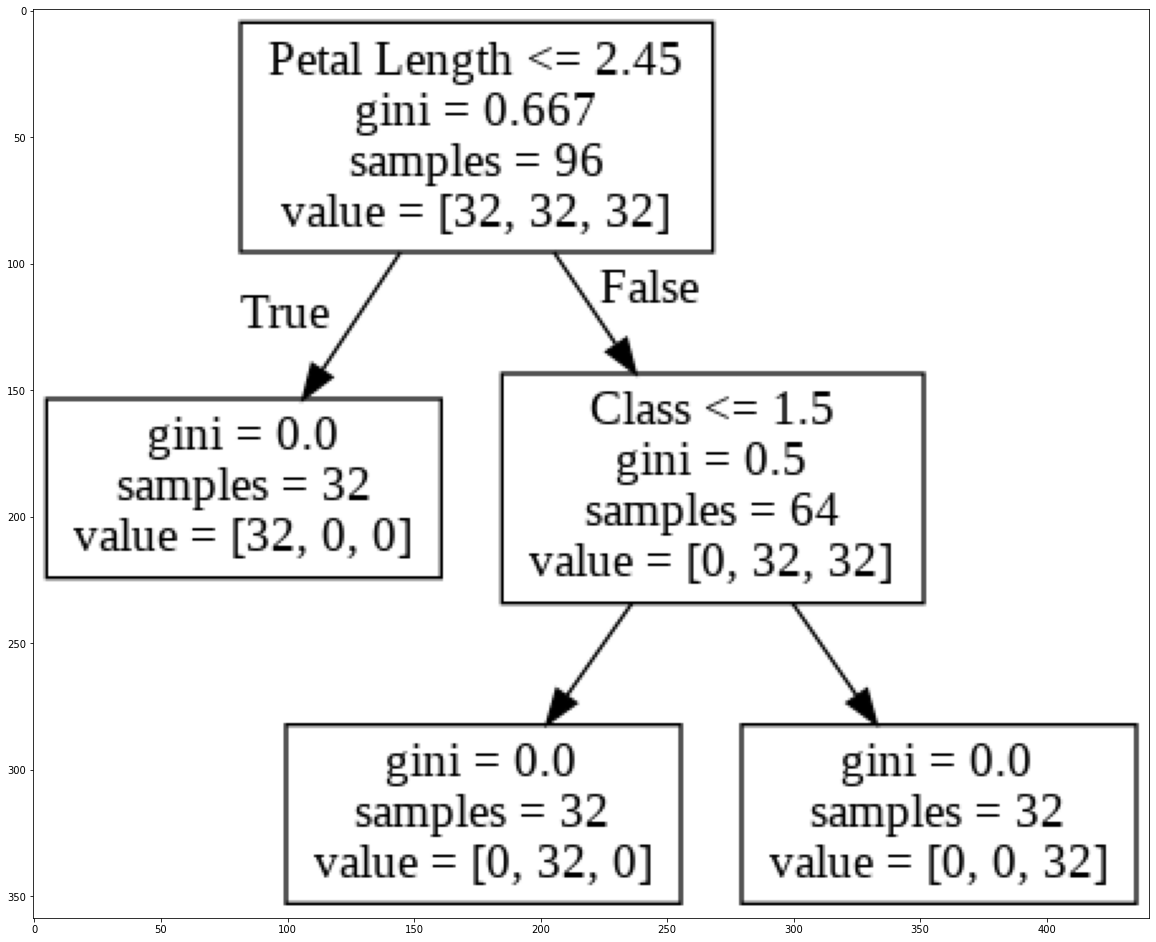

In [20]:
img_gini = cv2.imread('tree_gini.png')
plt.figure(figsize = (20, 20))
plt.imshow(img_gini)

# Menentukan Prediksi Test (Gini)
* Model yang digunakan = 'model_gini'
* Data yang diprediksi berasal dari 'X_test'
* Inisialisasi nama = 'predicted_tree_gini'

In [21]:
predicted_tree_gini = model_gini.predict(X_test)

# Melihat Nilai Akurasi (Gini)
* Menggunakan metricss pada sklearn
* Perbandingan yang digunakan 'y_test' dan prediksi 'predicted_tree_gini'

In [22]:
metrics.accuracy_score(y_test, predicted_tree_gini)

1.0

# Melihat Laporan Klasifikasi (Gini)
* Model yang digunakan = 'model_gini'
* Terdapat 3 matriks, yaitu: precision, recall, dan f1-score.
* Semakin tinggi nilai, semakin banyak hasil klasifikasinya.
* Pembagian data testing adalah 53
> 1. Iris-setosa	(0) 	= 17
> 2. Iris-versicolor (1)	= 18
> 3. Iris-virginica 2)	= 18

In [23]:
print(classification_report(y_test, predicted_tree_gini))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

